In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [11]:
# 데이터 불러오기
melting = pd.read_csv(r"C:\bbalgayo\플젝02_0822\2.AI분석모델검증\meltingA.csv", header=0)
print(melting)

                     Time       유효전력량    유효전력      평균전압     A상 전압     B상 전압  \
0     2021-01-08 00:00:00  22247.5000  12.800  399.7621  400.6308  400.4628   
1     2021-01-08 00:15:00  22252.5000  43.520  398.1065  399.0638  398.7111   
2     2021-01-08 00:30:00  22261.0996   0.099  403.0896  403.2937  404.1078   
3     2021-01-08 00:45:00  22261.0996   0.099  403.6593  403.0548  405.9539   
4     2021-01-08 01:00:00  22261.1992   0.099  397.7405  396.1586  398.7974   
...                   ...         ...     ...       ...       ...       ...   
9115  2021-04-12 22:45:00  85330.7969  64.256  389.1909  386.1894  389.1317   
9116  2021-04-12 23:00:00  85333.6016   0.072  388.3602  391.5731  390.1074   
9117  2021-04-12 23:15:00  85333.6016   0.081  397.7904  396.4237  399.7598   
9118  2021-04-12 23:30:00  85335.6016  17.536  398.7989  398.5103  399.6356   
9119  2021-04-12 23:45:00  85340.3984  22.272  392.4852  393.9239  393.5667   

         C상 전압      평균전류     A상 전류     B상 전류    C상 

In [13]:
# 컬럼명 정리 (빈 칸을 제거)
melting.columns = melting.columns.str.replace(' ', '')
print(melting.head())

                  Time       유효전력량    유효전력      평균전압      A상전압      B상전압  \
0  2021-01-08 00:00:00  22247.5000  12.800  399.7621  400.6308  400.4628   
1  2021-01-08 00:15:00  22252.5000  43.520  398.1065  399.0638  398.7111   
2  2021-01-08 00:30:00  22261.0996   0.099  403.0896  403.2937  404.1078   
3  2021-01-08 00:45:00  22261.0996   0.099  403.6593  403.0548  405.9539   
4  2021-01-08 01:00:00  22261.1992   0.099  397.7405  396.1586  398.7974   

       C상전압      평균전류      A상전류      B상전류     C상전류    무효전력       무효전력량  \
0  399.9776   48.2500    0.6837   72.7036  72.1466  16.256  10288.4004   
1  398.5960  110.5000  119.1312  164.3842  48.7850   9.536  10291.5996   
2  403.6672    0.2070    0.2368    0.0989   0.2883   0.099  10292.5000   
3  401.4117    0.2090    0.2359    0.1061   0.2869   0.090  10292.5000   
4  394.4847    0.2012    0.2319    0.0922   0.2811   0.090  10292.5996   

       주파수       역률  
0  60.1432  50.7283  
1  60.0000  74.8722  
2  60.0000  55.0740  
3  60.0755

In [14]:
melting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9120 non-null   object 
 1   유효전력량   9120 non-null   float64
 2   유효전력    9120 non-null   float64
 3   평균전압    9120 non-null   float64
 4   A상전압    9120 non-null   float64
 5   B상전압    9120 non-null   float64
 6   C상전압    9120 non-null   float64
 7   평균전류    9120 non-null   float64
 8   A상전류    9120 non-null   float64
 9   B상전류    9120 non-null   float64
 10  C상전류    9120 non-null   float64
 11  무효전력    9120 non-null   float64
 12  무효전력량   9120 non-null   float64
 13  주파수     9120 non-null   float64
 14  역률      9120 non-null   float64
dtypes: float64(14), object(1)
memory usage: 1.0+ MB


In [ ]:
# 원하는 값들만 불러와서 새로 저장
# 평균컬럼, 누적컬럼(유효전력량, 무효전력량)은 제거 후 다시 저장
melt = melting.loc[:, [ '유효전력', 'A상전압', 'B상전압', 'C상전압', 'A상전류', 'B상전류', 'C상전류', '무효전력', '주파수', '역률']] 
print(melt)

In [17]:
# 결측치 및 타입 등 데이터 정보 확인
melt.info()
print(melt.isna().sum())
print(melt.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   유효전력    9120 non-null   float64
 1   A상전압    9120 non-null   float64
 2   B상전압    9120 non-null   float64
 3   C상전압    9120 non-null   float64
 4   A상전류    9120 non-null   float64
 5   B상전류    9120 non-null   float64
 6   C상전류    9120 non-null   float64
 7   무효전력    9120 non-null   float64
 8   주파수     9120 non-null   float64
 9   역률      9120 non-null   float64
dtypes: float64(10)
memory usage: 712.6 KB
유효전력    0
A상전압    0
B상전압    0
C상전압    0
A상전류    0
B상전류    0
C상전류    0
무효전력    0
주파수     0
역률      0
dtype: int64
              유효전력         A상전압         B상전압         C상전압         A상전류  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean     27.906599   423.643442   397.031913   394.681007    40.795654   
std      35.010155   277.410368     8.775455     8.975695    63.062644 

In [18]:
# 폰트 나눔바른고딕으로 설정하기
plt.rcParams['font.family'] = 'NanumBarunGothic'

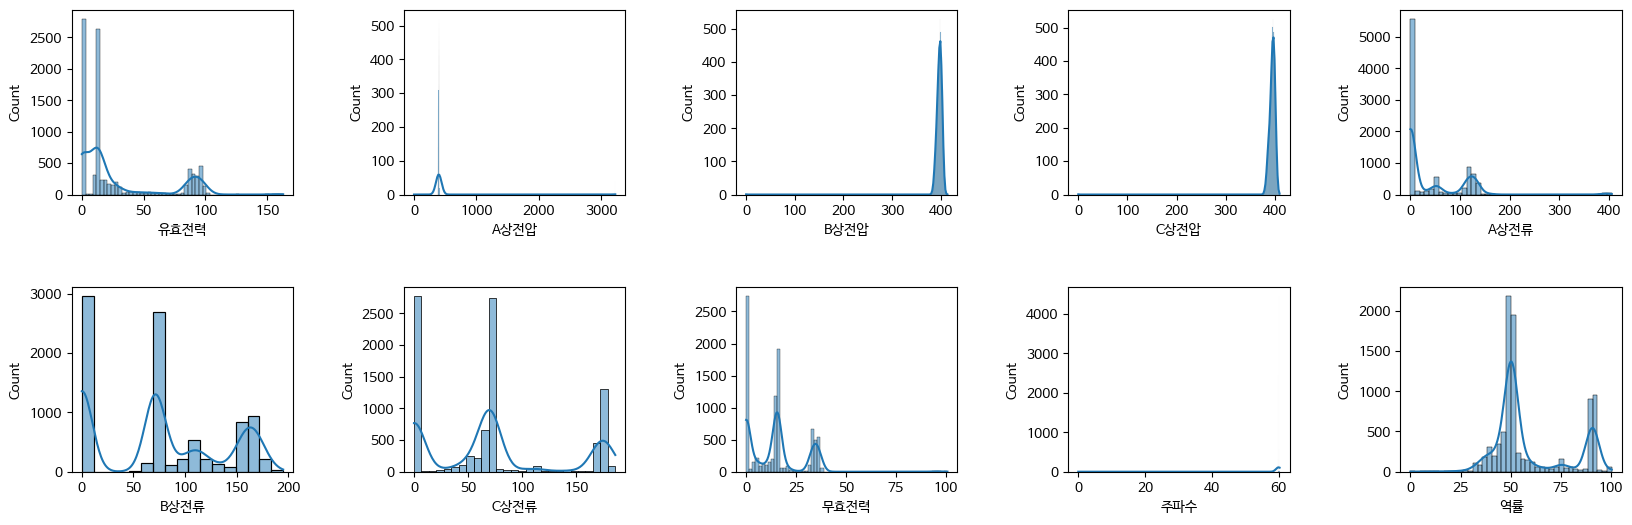

In [20]:
# 밀도확인
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)
fig.set_size_inches(20, 6)
plt.subplots_adjust(wspace=0.5, hspace=0.5) # 그래프의 간격을 지정
sns.histplot(data=melt['유효전력'], kde=True, ax=ax1)
sns.histplot(data=melt['A상전압'], kde=True, ax=ax2)
sns.histplot(data=melt['B상전압'], kde=True, ax=ax3)
sns.histplot(data=melt['C상전압'], kde=True, ax=ax4)
sns.histplot(data=melt['A상전류'], kde=True, ax=ax5)
sns.histplot(data=melt['B상전류'], kde=True, ax=ax6)
sns.histplot(data=melt['C상전류'], kde=True, ax=ax7)
sns.histplot(data=melt['무효전력'], kde=True, ax=ax8)
sns.histplot(data=melt['주파수'], kde=True, ax=ax9)
sns.histplot(data=melt['역률'], kde=True, ax=ax10)
plt.show()

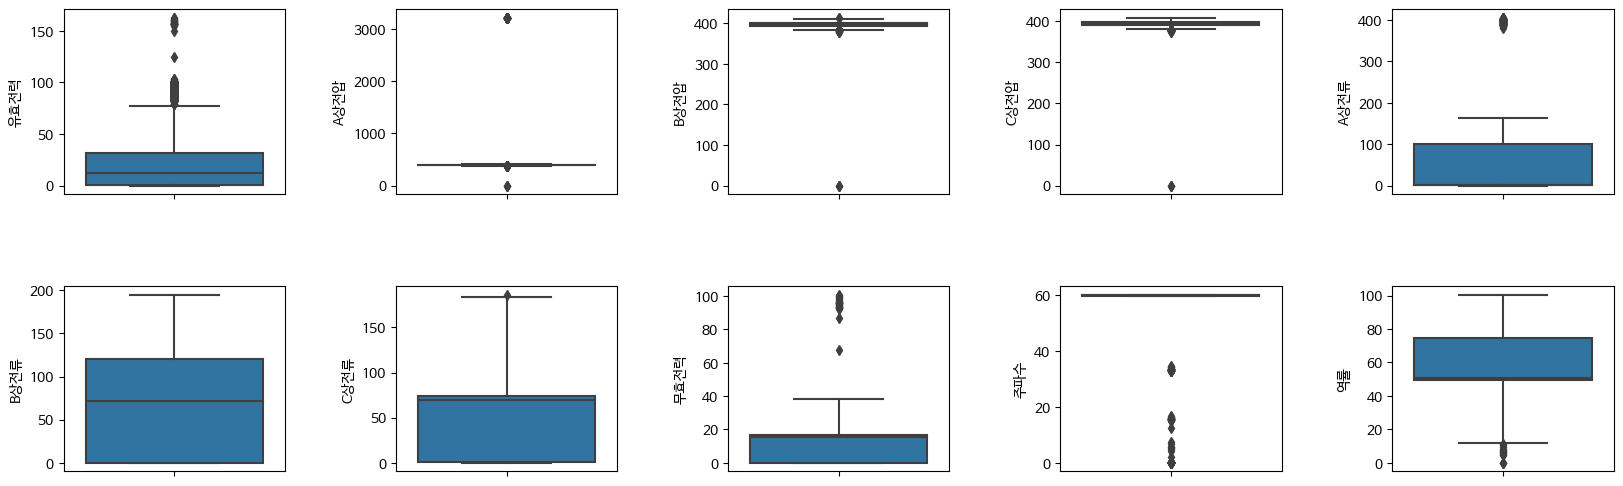

In [21]:
# 이상치 확인(시각화)
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5)
fig.set_size_inches(20, 6)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #그래프의 간격을 지정
sns.boxplot(y=melt['유효전력'], ax=ax1)
sns.boxplot(y=melt['A상전압'],  ax=ax2)
sns.boxplot(y=melt['B상전압'], ax=ax3)
sns.boxplot(y=melt['C상전압'], ax=ax4)
sns.boxplot(y=melt['A상전류'],  ax=ax5)
sns.boxplot(y=melt['B상전류'],ax=ax6)
sns.boxplot(y=melt['C상전류'], ax=ax7)
sns.boxplot(y=melt['무효전력'], ax=ax8)
sns.boxplot(y=melt['주파수'],  ax=ax9)
sns.boxplot(y=melt['역률'], ax=ax10)
plt.show()

In [22]:
melt_corr = melt.corr(method='pearson', numeric_only=True)
print(melt_corr)

          유효전력      A상전압      B상전압      C상전압      A상전류      B상전류      C상전류  \
유효전력  1.000000  0.110671 -0.298746 -0.317870  0.824505  0.862298  0.911038   
A상전압  0.110671  1.000000  0.007781  0.048011  0.548300 -0.046895  0.013849   
B상전압 -0.298746  0.007781  1.000000  0.973841 -0.263029 -0.267278 -0.246506   
C상전압 -0.317870  0.048011  0.973841  1.000000 -0.255729 -0.237200 -0.271747   
A상전류  0.824505  0.548300 -0.263029 -0.255729  1.000000  0.661857  0.661664   
B상전류  0.862298 -0.046895 -0.267278 -0.237200  0.661857  1.000000  0.877069   
C상전류  0.911038  0.013849 -0.246506 -0.271747  0.661664  0.877069  1.000000   
무효전력  0.879512  0.162936 -0.221790 -0.238865  0.659486  0.815455  0.957161   
주파수  -0.055866 -0.921775  0.201041  0.159414 -0.516142  0.065842  0.016518   
역률    0.900334 -0.004032 -0.240744 -0.240497  0.729258  0.818350  0.768621   

          무효전력       주파수        역률  
유효전력  0.879512 -0.055866  0.900334  
A상전압  0.162936 -0.921775 -0.004032  
B상전압 -0.221790  0.201041 -0.24

In [23]:
print("#-----양의 상관관계 내림차순")
print(melt_corr.loc[melt_corr['무효전력']>0, '무효전력'].sort_values(ascending=False, inplace=False))
print("#-----음의 상관관계 내림차순")
print(melt_corr.loc[melt_corr['무효전력']<0, '무효전력'].sort_values(ascending=False, inplace=False))

#-----양의 상관관계 내림차순
무효전력    1.000000
C상전류    0.957161
유효전력    0.879512
B상전류    0.815455
역률      0.680898
A상전류    0.659486
A상전압    0.162936
Name: 무효전력, dtype: float64
#-----음의 상관관계 내림차순
주파수    -0.067380
B상전압   -0.221790
C상전압   -0.238865
Name: 무효전력, dtype: float64


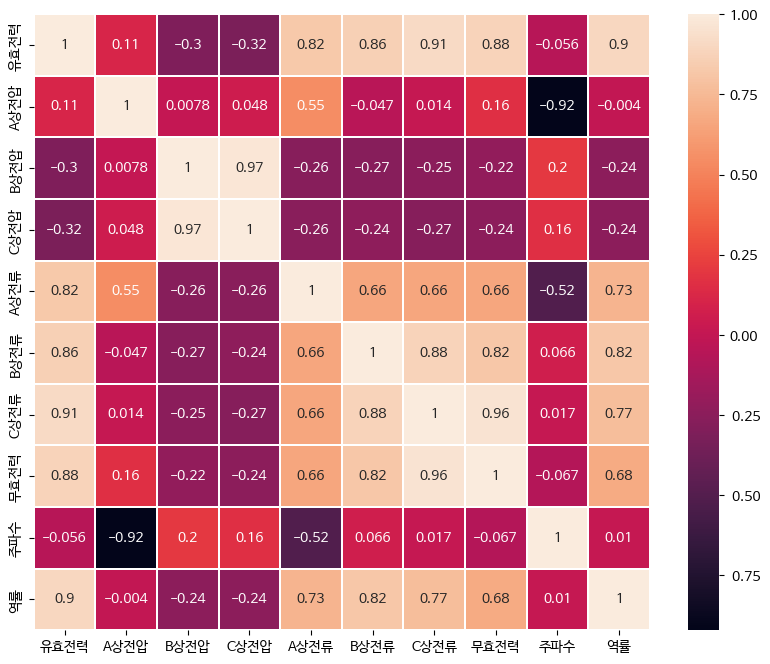

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(melt_corr, linecolor='white', linewidths=0.1, annot=True, square=True)
plt.show()

In [28]:
# 독립변수 종속변수 분류
X = melt.loc[:, ['유효전력', 'A상전압', 'B상전압', 'C상전압', 'A상전류', 'B상전류', 'C상전류', '주파수', '역률']]
Y = melt.loc[:, ['무효전력']] 

# 테스트 / 훈련 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=87)
print("훈련데이터 독립변수 세트 사이즈 :", X_train.shape)
print("테스트데이터 독립변수 세트 사이즈 :", X_test.shape)
print("훈련데이터 종속변수 사이즈 :", y_train.shape)
print("테스트데이터 종속변수 사이즈 :", y_test.shape)

훈련데이터 독립변수 세트 사이즈 : (6384, 9)
테스트데이터 독립변수 세트 사이즈 : (2736, 9)
훈련데이터 종속변수 사이즈 : (6384, 1)
테스트데이터 종속변수 사이즈 : (2736, 1)


In [29]:
lr = LinearRegression()
lasso = Lasso(alpha = 10)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05)       # 기본학습기의 개수
lgb_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05)

In [31]:
# --------------------- 모델성능비교 ---------------------
model = [lr, lasso, xgb_reg, lgb_reg]
index = ['MSE', 'RMSE', 'R²']
score = pd.DataFrame(index=index)
for m in model:
    # print(m)
    m.fit(X_train, y_train)
    Y_predict = m.predict(X_test)
    mse = mean_squared_error(y_test, Y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,Y_predict)
    score[m.__class__.__name__] = [mse, rmse, r2]
    # print(m.__class__.__name__)
    # print('MSE: {:.3f}, RMSE: {:.3f}'.format(mse, rmse))
    # print('R²(Variance score):{:.3f}'.format(r2))
    # print('-------------------------')
print(score)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2117
[LightGBM] [Info] Number of data points in the train set: 6384, number of used features: 9
[LightGBM] [Info] Start training from score 14.504118
      LinearRegression      Lasso  XGBRegressor  LGBMRegressor
MSE           4.336928  10.706295      0.527861       0.519227
RMSE          2.082529   3.272047      0.726541       0.720574
R²            0.975608   0.939785      0.997031       0.997080


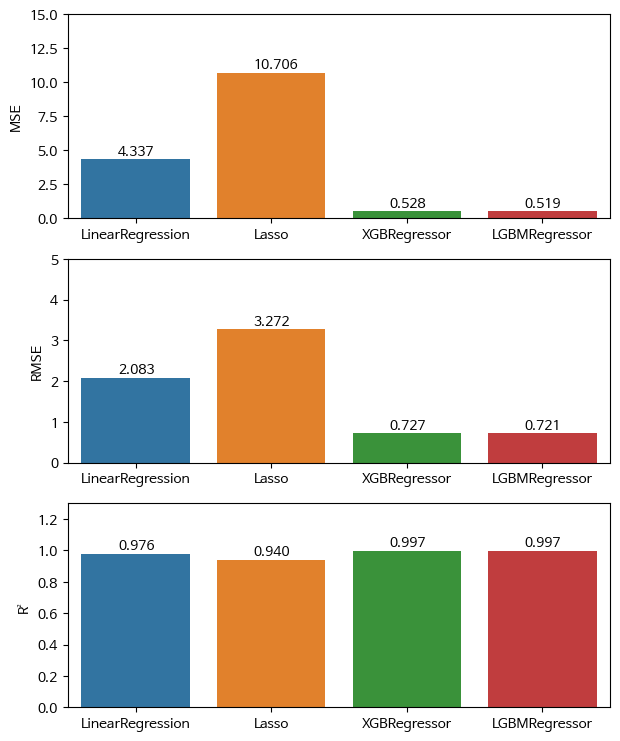

In [32]:
# --------------------- 모델성능비교 시각화 ---------------------
fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
fig.set_size_inches(7, 9)
sns.barplot(x=score.columns, y=score.loc['MSE'], ax=ax0)
ax0.set_ylim(0, 15)
sns.barplot(x=score.columns, y=score.loc['RMSE'], ax=ax1)
ax1.set_ylim(0, 5)
sns.barplot(x=score.columns, y=score.loc['R²'], ax=ax2)
ax2.set_ylim(0, 1.3)

# 그래프 위에 수치 적기
for i in range(len(score.columns)):
    for j in range(3):
        if j == 0:
            t = ax0.patches[i]
        # print(i)
            ax0.text(x=t.get_x() + t.get_width()-0.53, y=t.get_height()+0.3, s='{:.3f}'.format(score.iloc[0, i]))
        elif j == 1:
            t = ax1.patches[i]
            ax1.text(x=t.get_x() + t.get_width()-0.53, y=t.get_height()+0.1, s='{:.3f}'.format(score.iloc[1, i]))
        else:
            t = ax2.patches[i]
            ax2.text(x=t.get_x() + t.get_width()-0.53, y=t.get_height()+0.03, s='{:.3f}'.format(score.iloc[2, i]))
plt.show()

In [34]:
# --------------------- 검증 ---------------------
kfold = KFold(10, shuffle=True)
for m in model:
    result = cross_val_score(m, X, Y, cv=kfold)
    print(result)
    print(m.__class__.__name__, "검증 결과: {:.3f}".format(result.mean()))
    print('-------------------------')

[0.9789483  0.97938065 0.97391115 0.98163999 0.97937846 0.97679375
 0.97296691 0.9796363  0.98085452 0.98229795]
LinearRegression 검증 결과: 0.979
-------------------------
[0.96518902 0.91213431 0.95066684 0.93495529 0.95988454 0.94128215
 0.93903828 0.97146718 0.96054231 0.96781878]
Lasso 검증 결과: 0.950
-------------------------
[0.99905614 0.99958305 0.99428499 0.99840447 0.99928284 0.99877039
 0.99835853 0.99910065 0.99961678 0.99846636]
XGBRegressor 검증 결과: 0.998
-------------------------
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 8208, number of used features: 9
[LightGBM] [Info] Start training from score 14.405146
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.

In [35]:
# 가상데이터 샘플
data = {'유효전력':[79834.10, 68343.123, 58500.101,0], 'A상전압':[2920.14,356.123,397.2544,0], 'B상전압':[571.33,410.9,398.13,0], 'C상전압':[384.23, 382.55,400.231,0], 'A상전류':[248.241, 200.44,0.2423,0], 'B상전류':[171.23, 150.235,0.0423,0], 'C상전류':[150.341, 180.243,0.1332,0], '주파수':[60.0, 59.75,60,0], '역률':[42.8,100.434, 60,0]}
df_data = pd.DataFrame(data)

# 샘플데이터 예측
# XGB성능이 가장 좋으므로 XGB 모델로 선택
print(xgb_reg.predict(df_data))

[9.8603630e+01 9.7876518e+01 1.2041444e+01 1.6952663e-03]
